In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = df.drop("species", axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  
kmeans.fit(X_scaled)

df["cluster"] = kmeans.labels_

In [11]:
# Map cluster labels to species labels
cluster_to_species = {
    0: "setosa",
    1: "versicolor",
    2: "virginica"
}
df["predicted_species"] = df["cluster"].map(cluster_to_species)

# Display the first few rows with predicted species
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,predicted_species
0,5.1,3.5,1.4,0.2,Iris-setosa,1,versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa,1,versicolor
2,4.7,3.2,1.3,0.2,Iris-setosa,1,versicolor
3,4.6,3.1,1.5,0.2,Iris-setosa,1,versicolor
4,5.0,3.6,1.4,0.2,Iris-setosa,1,versicolor


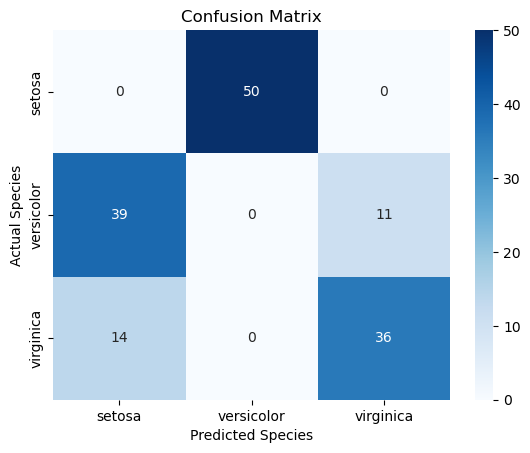

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        50
  versicolor       0.00      0.00      0.00        50
   virginica       0.77      0.72      0.74        50

    accuracy                           0.24       150
   macro avg       0.26      0.24      0.25       150
weighted avg       0.26      0.24      0.25       150



In [19]:
df["species"] = df["species"].map({
    "Iris-setosa": "setosa",
    "Iris-versicolor": "versicolor",
    "Iris-virginica": "virginica"
})

conf_matrix = confusion_matrix(df["species"], df["predicted_species"])
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=cluster_to_species.values(), yticklabels=cluster_to_species.values())
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(df["species"], df["predicted_species"]))

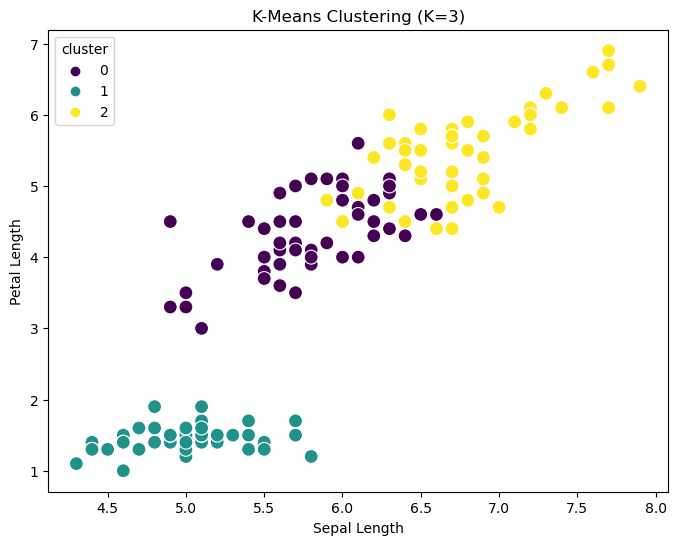

In [15]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x="sepal_length", y="petal_length", hue="cluster", data=df, palette="viridis", s=100)
plt.title("K-Means Clustering (K=3)")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.show()